# Test 4 - solution

## Question 3

### (a)

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

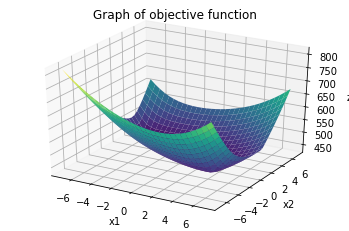

In [ ]:
def f(x1, x2):
    return 14*np.sqrt((x1 - 7)**2 + (x2 - 2)**2) + 20*np.sqrt((x1 - 5)**2 + (x2 + 3)**2) + 30*np.sqrt((x1 + 6)**2 + (x2 - 4)**2)

x1 = np.linspace(-7, 7, 30)
x2 = np.linspace(-7, 7, 30)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
fig.canvas.set_window_title('Qualified 5')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
ax.set_title('Graph of objective function')
plt.show()

### (b) Algorithm with Steepest Descent for direction search and Exact Line Search for line search 

Importing sympy library, setting expressions and defining evaluate function

In [ ]:
import sympy as sp

sp.init_printing(use_unicode=True)
x1, x2, a = sp.symbols('x1 x2 a', real=True)

def evaluate(func, x):
	return func.evalf(subs={x1: x[0], x2: x[1]})

Expression of **objective function**:

In [ ]:
f = 14 * ((x1 - 7)**2 + (x2 - 2)**2)**0.5 + \
    20 * ((x1 - 5)**2 + (x2 + 3)**2)**0.5 + \
    30 * ((x1 + 6)**2 + (x2 - 4)**2)**0.5
f

Expression of **gradient** of objective function:

In [ ]:
gradient = sp.Matrix([f]).jacobian((x1,x2)).T
gradient

⎡                                         -0.5                                
⎢                  ⎛        2           2⎞                         ⎛        2 
⎢14⋅(1.0⋅x₁ - 7.0)⋅⎝(x₁ - 7)  + (x₂ - 2) ⎠     + 20⋅(1.0⋅x₁ - 5.0)⋅⎝(x₁ - 5)  
⎢                                                                             
⎢                                         -0.5                                
⎢                  ⎛        2           2⎞                         ⎛        2 
⎣30⋅(1.0⋅x₂ - 4.0)⋅⎝(x₁ + 6)  + (x₂ - 4) ⎠     + 14⋅(1.0⋅x₂ - 2.0)⋅⎝(x₁ - 7)  

            -0.5                                            -0.5⎤
          2⎞                         ⎛        2           2⎞    ⎥
+ (x₂ + 3) ⎠     + 30⋅(1.0⋅x₁ + 6.0)⋅⎝(x₁ + 6)  + (x₂ - 4) ⎠    ⎥
                                                                ⎥
            -0.5                                            -0.5⎥
          2⎞                         ⎛        2           2⎞    ⎥
+ (x₂ - 2) ⎠     + 20⋅(1.0⋅x₂ + 3.0)⋅⎝(x₁ - 5)  + 

Expression of **Hessian** of objective function:

In [ ]:
Hessian = sp.hessian(f,(x1,x2))
Hessian

⎡                                                         -1.5                
⎢                                  ⎛        2           2⎞                    
⎢30⋅(-1.0⋅x₁ - 6.0)⋅(1.0⋅x₁ + 6.0)⋅⎝(x₁ + 6)  + (x₂ - 4) ⎠     + 20⋅(-1.0⋅x₁ +
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                    14⋅(1.0⋅x₁ - 7.0)⋅(-1.0⋅x

                                            -1.5                              
                     ⎛        2           2⎞                                  
 5.0)⋅(1.0⋅x₁ - 5.0)⋅⎝(x₁ - 5)  + (x₂ + 3) ⎠     + 14⋅(-1.0⋅x₁ + 7.0)⋅(1.0⋅x₁ 
                                                                              
                                -1.5                                          
         ⎛        2           2⎞                   

Setting tolerance

In [ ]:
tolerance = 1e-5

In [ ]:
j = 0
x = sp.Matrix([[0],[0]])
fx = evaluate(f,x)
grad = evaluate(gradient,x)

while (grad.norm() > tolerance):
    
    # direction searching
    d = -grad

    # line searching
    h = x + a*d
    g = d.T*gradient.subs({x1:h[0], x2:h[1]})
    alpha = sp.nsolve(g[0], a, 0)
        
    print(f'Iteration {j}')
    print(f'x\t\t\t\t:\t{x}')
    print(f'f(x)\t\t\t\t:\t{fx}')
    print(f'direction\t\t\t:\t{d}')
    print(f'alpha\t\t\t\t:\t{alpha}\n')
    print()

    # Updating
    x = x + alpha*d
    j += 1
    fx = evaluate(f,x)
    grad = evaluate(gradient,x)

print(f'x\t\t\t\t:\t{x}')
print(f'f(x)\t\t\t\t:\t{fx}')

Iteration 0
x				:	Matrix([[0], [0]])
f(x)				:	434.873652874673
direction			:	Matrix([[5.64968495108710], [10.1971865687696]])
alpha				:	0.115827110161578


Iteration 1
x				:	Matrix([[0.654386681207772], [1.18111065203904]])
f(x)				:	426.988540282377
direction			:	Matrix([[0.673460663951955], [-0.373126504317511]])
alpha				:	0.852384370453679


Iteration 2
x				:	Matrix([[1.22843402527578], [0.863063451556776]])
f(x)				:	426.725293408868
direction			:	Matrix([[0.187415772774978], [0.338269057029250]])
alpha				:	0.116869310826961


Iteration 3
x				:	Matrix([[1.25033717747809], [0.902596723125870]])
f(x)				:	426.716556233069
direction			:	Matrix([[0.0205405869951139], [-0.0113803787397807]])
alpha				:	0.743129525261623


Iteration 4
x				:	Matrix([[1.26560149414036], [0.894139627675680]])
f(x)				:	426.716351100809
direction			:	Matrix([[0.00438606830408754], [0.00791646918144289]])
alpha				:	0.116955268445870


Iteration 5
x				:	Matrix([[1.26611446793629], [0.895065500453939

### (c) By virtue of the graph of the objective function in item (a) of the question, the stationary point arrived in item (b) must be the solution since the function is convex.